## Insurance Forecast using Regression models

### Different regression models that we will consider:
- Linear Regression
- Polynomial Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression
- Decision Tree Regression
- Random Forest Regression

In [2]:
# importing libraries

import numpy as np # data manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline

In [47]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# importing the dataset
df = pd.read_csv('insurance.csv')

# viewing top 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Overviewing Columns:

- age: age of primary beneficiary
- sex:  gender..female, male
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to   height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: number of children covered by health insurance / number of dependents
- smoker: smoking
- region: the beneficiary's residential area.
- charges: individual medical costs billed by health insurance.

## Data Cleaning and Feature Engineering

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no NAN in the data

In [30]:
df.count()

age          1338
bmi          1338
children     1338
charges      1338
male         1338
yes          1338
northeast    1338
northwest    1338
southeast    1338
southwest    1338
dtype: int64

In [29]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])
df['sex'].unique()
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['smoker'].unique()
df['region']= label_encoder.fit_transform(df['region'])
df['region'].unique()



array([3, 2, 1, 0])

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Data Visualization

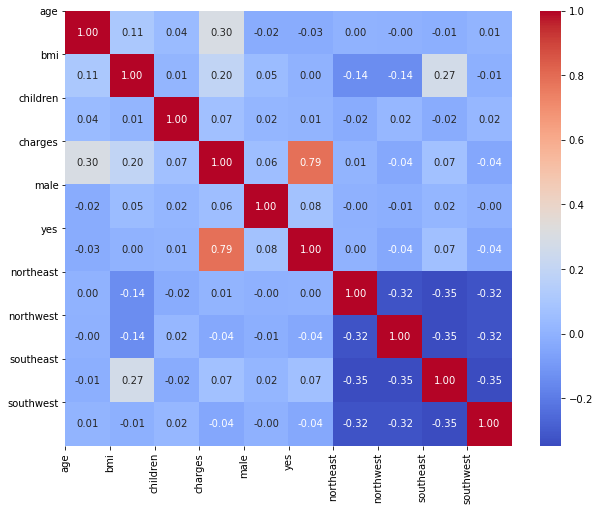

In [8]:
corr = df.corr()

#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


C:\Users\hifza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hifza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


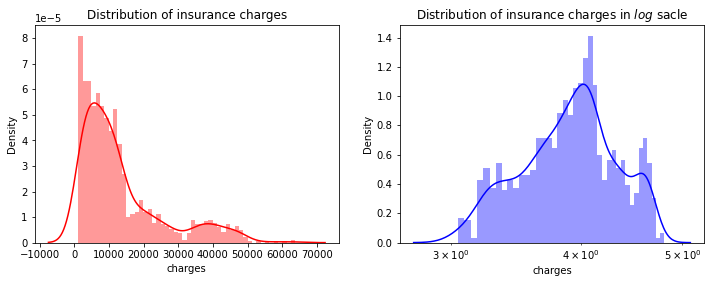

In [9]:
fig = plt.figure(figsize=(12,4))

ax=fig.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=fig.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

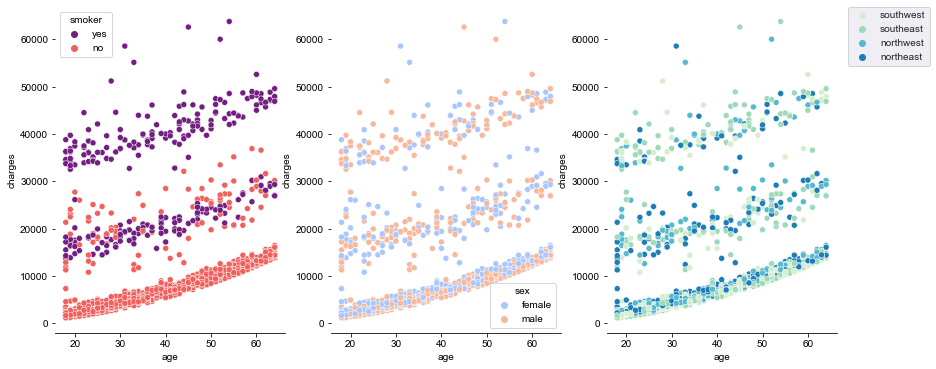

In [10]:
fig, ax =plt.subplots(nrows= 1, ncols = 3, figsize= (14,6))
sns.scatterplot(x='age', y='charges', data=df, palette='magma',hue='smoker',ax=ax[0])
sns.scatterplot(x='age', y='charges', data=df, palette='coolwarm',hue='sex',ax=ax[1])
sns.scatterplot(x='age', y='charges', data=df, palette='GnBu',hue='region',ax=ax[2])
sns.set_style('dark')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)

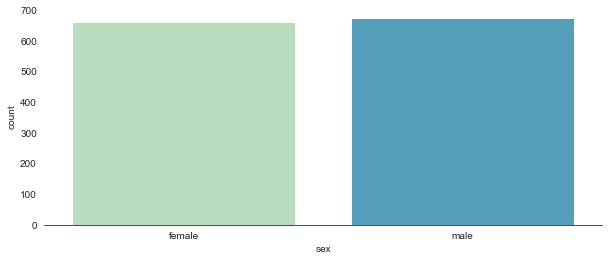

In [11]:
plt.figure(figsize=(10,4))
sns.set_style('white')
sns.countplot(x='sex', data = df, palette='GnBu')
sns.despine(left=True)


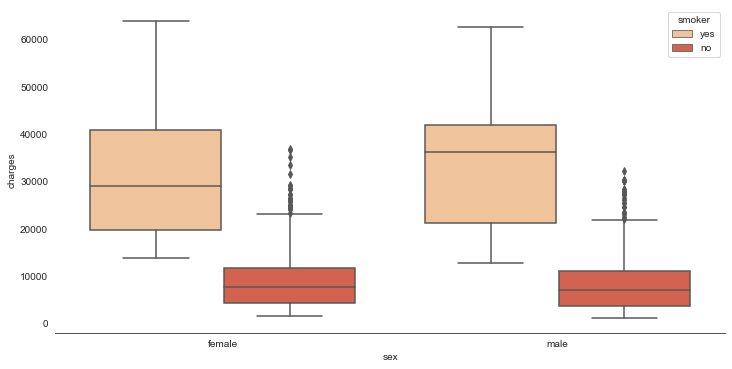

In [12]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x='sex', y='charges', data = df, palette='OrRd', hue='smoker')
sns.despine(left=True)

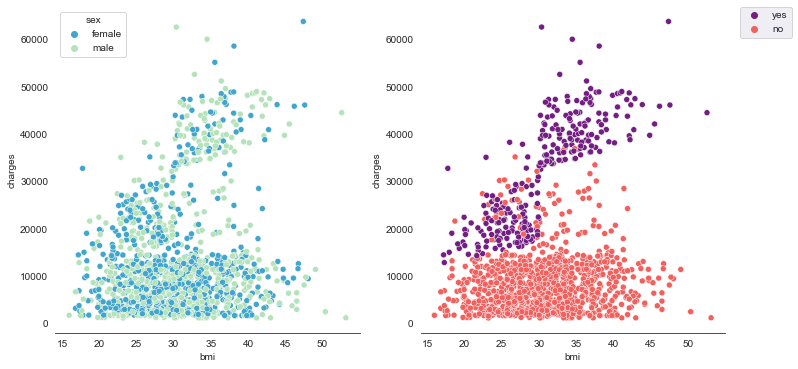

In [13]:
fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (12,6))
sns.scatterplot(x='bmi', y='charges', data = df, palette='GnBu_r', hue='sex', ax=ax[0])
sns.scatterplot(x='bmi', y='charges', data = df, palette='magma', hue='smoker', ax=ax[1])
sns.set_style('dark')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Box plot of charges vs children')

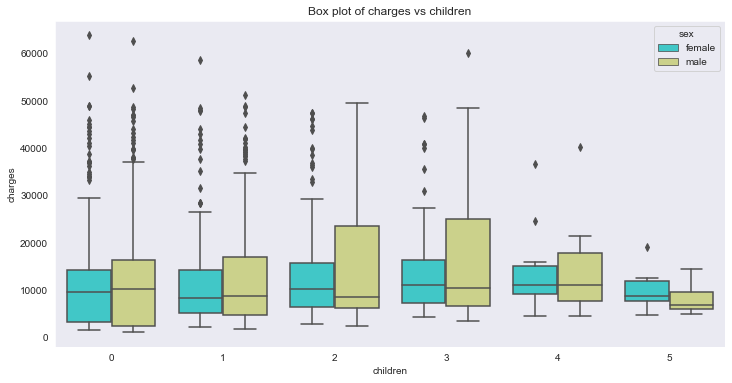

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children')

## Linear Regression

In [4]:
df = df.drop(['sex', 'smoker', 'region'], axis=1)
df.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [5]:
X=df.drop('charges', axis=1)  # independent variable
y=df['charges'] # dependent variable

In [6]:
# splitting the dataset into train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [7]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1070, 9)
Shape of X_test:  (268, 9)
Shape of y_train:  (1070,)
Shape of y_test (268,)


In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Predicting Cross Validation Score of the Test set
cv_linear = cross_val_score(estimator = lr, X = X, y = y, cv = 10)

# Predicting R2 Score of the Train set 
y_pred_linear_train = lr.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score of the Test set 
y_pred_linear_test = lr.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting MAE and RMSE of the Test set 
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
mae_linear = mean_absolute_error(y_test, y_pred_linear_test)

# printing the results
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("MAE: ", mae_linear)
print("RMSE: ", rmse_linear)


CV:  0.7445006998667605
R2_score (train):  0.7493874603467352
R2_score (test):  0.755950182600408
MAE:  4002.5223760354324
RMSE:  5972.829792222584


## Polynomial Regression

In [22]:
# creating the polynomial features and the regressor model
from sklearn.preprocessing import PolynomialFeatures

ply_reg = PolynomialFeatures(degree = 2)
X_ply = ply_reg.fit_transform(X)

X_train_ply = ply_reg.fit_transform(X_train)
ply_reg.fit(X_train_ply, y_train)

regressor_ply = LinearRegression()
regressor_ply.fit(X_train_ply, y_train)

LinearRegression()

In [23]:
# Predicting Cross Validation Score of the Test set
cv_ply = cross_val_score(estimator = regressor_ply, X = X_ply, y = y, cv = 10)

# Predicting R2 Score of the Train set
y_pred_ply_train = regressor_ply.predict(ply_reg.fit_transform(X_train))
r2_score_ply_train = r2_score(y_train, y_pred_ply_train)

# Predicting R2 Score of the Test set
y_pred_ply_test = regressor_ply.predict(ply_reg.fit_transform(X_test))
r2_score_ply_test = r2_score(y_test, y_pred_ply_test)

# Predicting MAE and RMSE of the Test set
rmse_ply = (np.sqrt(mean_squared_error(y_test, y_pred_ply_test)))
mae_ply = mean_absolute_error(y_test, y_pred_ply_test)

# printing the results
print('CV: ', cv_ply.mean())
print('R2_score (train): ', r2_score_ply_train)
print('R2_score (test): ', r2_score_ply_test)
print("MAE:", mae_ply)
print("RMSE: ", rmse_ply)


CV:  0.8023027922296965
R2_score (train):  0.8420967147965691
R2_score (test):  0.8515590935411167
MAE: 2889.040198358209
RMSE:  4658.195314011042


## Ridge Regression

In [24]:
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import Ridge  # for ridege regression

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [25]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV  # for hypertuning

parameters =  {  'model__alpha' : [43],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__solver' : ['auto'],
                'model__random_state': [42] 
}

regressor_ridge = GridSearchCV(ridge_pipe, parameters, iid=False, cv=10)
regressor_ridge = regressor_ridge.fit(X, y.ravel())

C:\Users\hifza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [26]:
print(regressor_ridge.best_score_)
print(regressor_ridge.best_params_)

0.8363491525351024
{'model__alpha': 43, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [27]:
# Predicting Cross Validation Score of the Test set
cv_ridge = regressor_ridge.best_score_

# Predicting R2 Score of the Train set 
y_pred_ridge_train = regressor_ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score of the Test set
y_pred_ridge_test = regressor_ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting MAE and RMSE of the Test set
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge_test)

# printing the results
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print('MAE:', mae_ridge)
print("RMSE: ", rmse_ridge)



CV:  0.8363491525351024
R2_score (train):  0.8442909457839328
R2_score (test):  0.8600055463028838
MAE: 2743.255721586038
RMSE:  4523.726191015872


## Lasso Regression

In [28]:
from sklearn.linear_model import Lasso  # for lasso regression

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
]

lasso_pipe = Pipeline(steps)

In [29]:

parameters =  {  'model__alpha' : [0.9949],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__max_iter' : [5000],
                'model__random_state': [42] 
}
regressor_lasso = GridSearchCV(lasso_pipe, parameters, iid=False, cv=10, n_jobs = -1, verbose = 4)
regressor_lasso = regressor_lasso.fit(X, y.ravel())

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   21.7s remaining:   32.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   21.7s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.8s finished
C:\Users\hifza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [30]:
# Predicting Cross Validation Score
cv_lasso = regressor_lasso.best_score_

# Predicting R2 Score of the Train set
y_pred_lasso_train = regressor_lasso.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score of the Test set
y_pred_lasso_test = regressor_lasso.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting MAE and RMSE pf the Test set
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso_test)

# printing the results
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print('MAE:', mae_lasso)
print("RMSE: ", rmse_lasso)


CV:  0.8362960263032919
R2_score (train):  0.8446264690154403
R2_score (test):  0.8601933817915626
MAE: 2709.045792364274
RMSE:  4520.690350979922


##  Support Vector Regression

In [31]:
from sklearn.svm import SVR # for support vector regression

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.values.reshape(-1,1))

In [32]:
# Creating the SVR regressor
svr_reg = SVR()

In [33]:
# Applying Grid Search to find the best model and the best parameters
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }

svr_reg = GridSearchCV(estimator = svr_reg,
                           param_grid = parameters,
                           cv = 10,
                           verbose = 4,
                           iid = True,
                           n_jobs = -1)
svr_reg = svr_reg.fit(X_scaled, y_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 394 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 585 out of 600 | elapsed:   13.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   14.8s finished
C:\Users\hifza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [34]:
print(svr_reg.best_params_)
print(svr_reg.best_score_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'tol': 0.0001}
0.8420262591949934


In [35]:
# Predicting Cross Validation Score
cv_svr = svr_reg.best_score_

# Predicting R2 Score of the Train set
y_pred_svr_train = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score of the Test set
y_pred_svr_test = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting MAE and RMSE of the Test set 
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
mae_svr = mean_absolute_error(y_test, y_pred_svr_test)

# printing the results
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print('MAE:', mae_svr)
print("RMSE: ", rmse_svr)


CV:  0.8420262591949934
R2_score (train):  0.8484794402469391
R2_score (test):  0.8579164312954045
MAE: 2418.7873999370936
RMSE:  4557.3546215590295


## Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor # for decisiton tree regression

In [37]:
# Creating the Decision Tree regressor
dt_reg = DecisionTreeRegressor(random_state = 42)

In [38]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "max_depth": np.arange(1,21),
              "min_samples_leaf": [1, 5, 10, 20, 50, 100],
              "min_samples_split": np.arange(2, 11),
              "criterion": ["mse"],
              "random_state" : [42]}
            ]

dt_reg = GridSearchCV(estimator = dt_reg,
                           param_grid  = parameters,
                           cv = 10,
                           verbose = 4,
                           iid = False,
                           n_jobs = -1)
dt_reg = dt_reg.fit(X_scaled, y_scaled)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 7984 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed:    7.9s finished
C:\Users\hifza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [39]:
print(dt_reg.best_params_)
print(dt_reg.best_score_)

{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}
0.8524782784394495


In [40]:
# Predicting Cross Validation Score
cv_dt = dt_reg.best_score_

# Predicting R2 Score of the Train set 
y_pred_dt_train = sc_y.inverse_transform(dt_reg.predict(sc_X.transform(X_train)))
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score of the Test set 
y_pred_dt_test = sc_y.inverse_transform(dt_reg.predict(sc_X.transform(X_test)))
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting MAE and RMSE of the Test set
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
mae_dt = mean_absolute_error(y_test, y_pred_dt_test)

# printing the results
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("MAE:", mae_dt)
print("RMSE: ", rmse_dt)


CV:  0.8524782784394495
R2_score (train):  0.8781014341612335
R2_score (test):  0.8757018713561981
MAE: 2352.5128264304017
RMSE:  4262.5863552851715


## Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor # for random forest regression

In [42]:
# Creating the Random Forest regressor
rf_reg = RandomForestRegressor()

In [43]:
# Applying GridSearch to find the best model and the best parameters
parameters =  { "n_estimators": [1200],
                "max_features": ["auto"],
                "max_depth": [50],
                "min_samples_split": [7],
                "min_samples_leaf": [10],
                "bootstrap": [True],
                "criterion": ["mse"],
                "random_state" : [42] }
            
rf_reg = GridSearchCV(estimator = rf_reg,
                                  param_grid = parameters,
                                  cv = 10,
                                # verbose = 4,
                                  n_jobs = -1)
rf_reg = rf_reg.fit(X_scaled, y.ravel())

In [44]:
print(rf_reg.best_params_)
print(rf_reg.best_score_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200, 'random_state': 42}
0.8587778462081067


In [45]:
# Predicting Cross Validation Score
cv_rf = rf_reg.best_score_

# Predicting R2 Score of the Train Set
y_pred_rf_train = rf_reg.predict(sc_X.transform(X_train))
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score of the Test set 
y_pred_rf_test = rf_reg.predict(sc_X.transform(X_test))
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting MAE and RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
mae_rf = mean_absolute_error(y_test, y_pred_rf_test)

# printing the results
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print('MAE:', mae_rf)
print("RMSE: ", rmse_rf)

CV:  0.8587778462081067
R2_score (train):  0.8929557070468243
R2_score (test):  0.8903051765846505
MAE: 2157.973810129339
RMSE:  4004.3678140790284


In [46]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression', rmse_ply, r2_score_ply_train, r2_score_ply_test, cv_ply.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [47]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,5972.829792,0.749387,0.755950,0.744501
1,Polynomial Regression,4658.195314,0.842097,0.851559,0.802303
2,Ridge Regression,4523.726191,0.844291,0.860006,0.836349
3,Lasso Regression,4520.690351,0.844626,0.860193,0.836296
4,Support Vector Regression,4557.354622,0.848479,0.857916,0.842026
5,Decision Tree Regression,4262.586355,0.878101,0.875702,0.852478
6,Random Forest Regression,4004.367814,0.892956,0.890305,0.858778


### Visualizing model performance

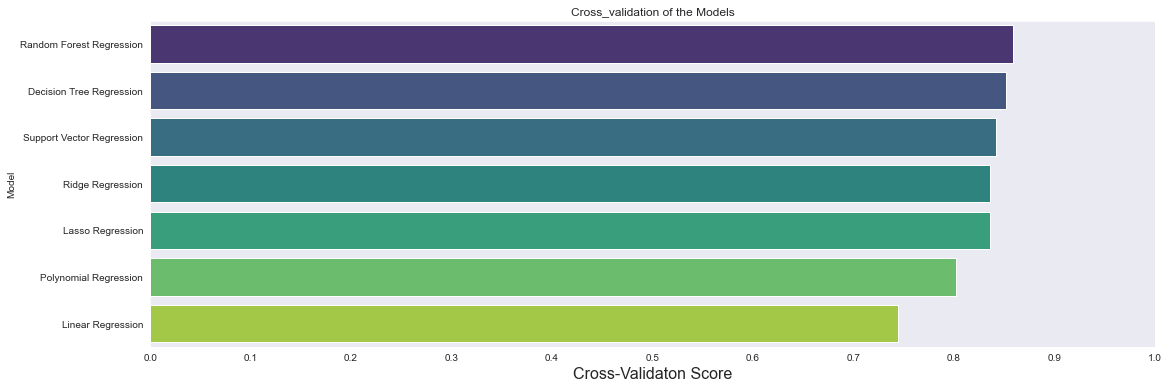

In [48]:
# comaprison of cross-validation between the models

f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe, palette='viridis')

axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.title('Cross_validation of the Models')
plt.show()

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hifza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hifza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hifza\anacond

Text(0.5, 0, 'Predict')

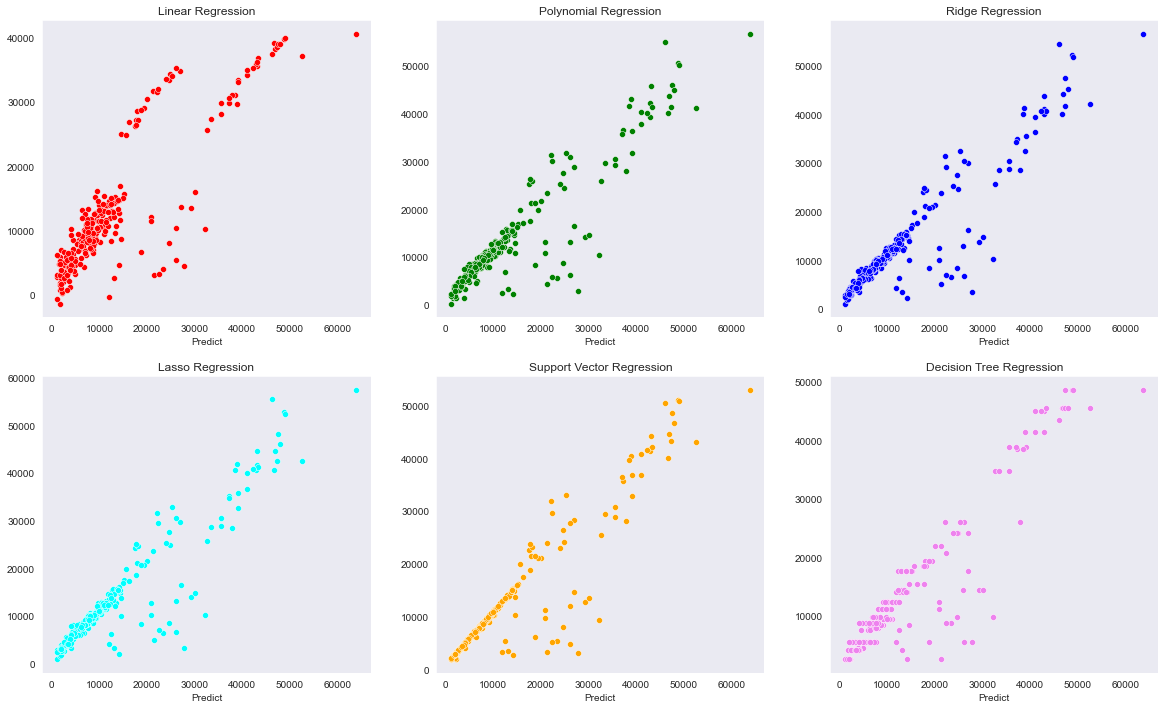

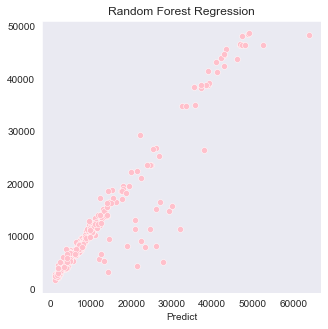

In [49]:
# comparison of R-square between the models
fig, ax = plt.subplots(2,3, figsize=(20,12))
sns.set_style('dark')
g = sns.scatterplot(y_test, y_pred_linear_test, ax=ax[0,0], color='red')
g.set_title('Linear Regression')
g.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_ply_test, ax=ax[0,1], color='green')
h.set_title('Polynomial Regression')
h.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_ridge_test, ax=ax[0,2], color='blue')
h.set_title('Ridge Regression')
h.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_lasso_test, ax=ax[1,0], color='cyan')
h.set_title('Lasso Regression')
h.set_xlabel('Predict')

sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_svr_test, ax=ax[1,1], color='orange')
h.set_title('Support Vector Regression')
h.set_xlabel('Predict')

sns.set_style('dark')
f = sns.scatterplot(y_test, y_pred_dt_test, ax=ax[1,2], color='violet')
f.set_title('Decision Tree Regression')
f.set_xlabel('Predict')

plt.figure(figsize=(5,5))
sns.set_style('dark')
f = sns.scatterplot(y_test, y_pred_rf_test, color='pink')
f.set_title('Random Forest Regression')
f.set_xlabel('Predict')

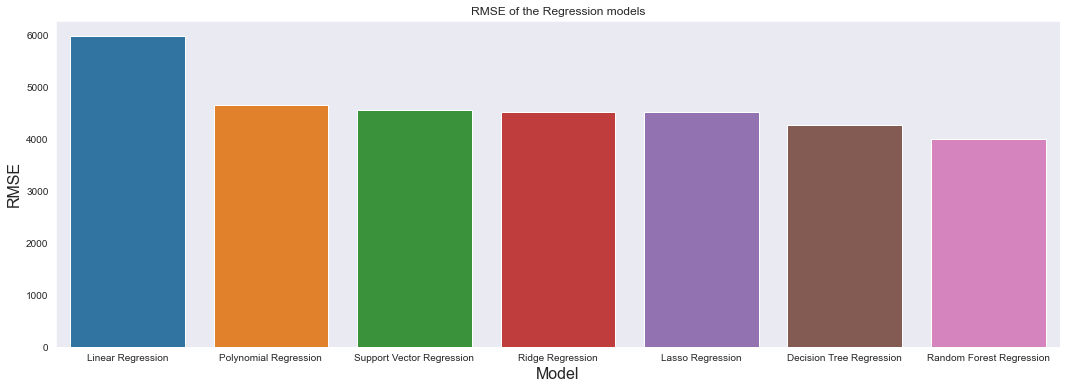

In [50]:
# comparison of RMSE between the models

predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)
plt.title('RMSE of the Regression models')
plt.show()

## MCMC

In [21]:
bmi=X['bmi']

In [24]:
bmi.head()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

In [23]:
bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

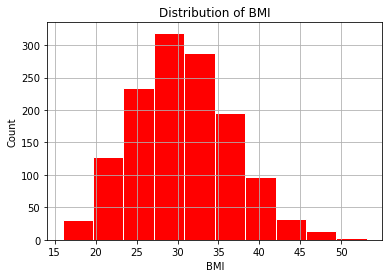

In [25]:
bmi.hist(color = "red", edgecolor = "white")
plt.xlabel('BMI'); plt.ylabel('Count');
plt.title('Distribution of BMI');

In [28]:
import pymc3 as pm
with pm.Model() as model_n:
    #Prior
    mu = pm.Uniform("mu", lower=-10, upper=10, testval=0)
    sigma = pm.Uniform("sigma", lower=0, upper=6, testval=0.0001)
    #Likelihood
    
    likelihood = pm.Normal("likelihood", mu=mu, sd=sigma, observed = bmi.values)
    
    #Posterior
    step  = [pm.Metropolis(), pm.NUTS()]
    trace = pm.sample(500, chains=2, step=step,progressbar=True)
    burned_trace = trace[300::]

<ipython-input-28-cd7b804fd4e0>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(500, chains=2, step=step,progressbar=True)
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [sigma]
>>Metropolis: [mu]
>NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 1844 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


<ipython-input-29-db7a53547537>:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\hifza\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'mu\n0'}>,
       <AxesSubplot:title={'center':'mu\n1'}>,
       <AxesSubplot:title={'center':'sigma\n0'}>,
       <AxesSubplot:title={'center':'sigma\n1'}>], dtype=object)

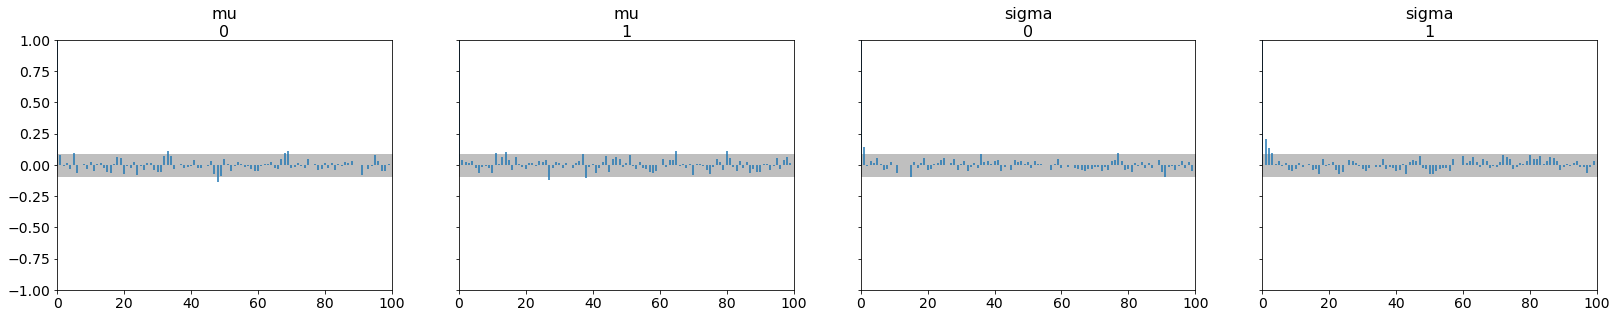

In [29]:
pm.autocorrplot(trace)

<ipython-input-30-4f39b97c40fe>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(burned_trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\hifza\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

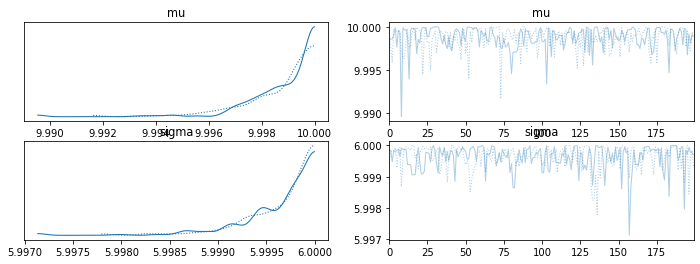

In [30]:
pm.traceplot(burned_trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\hifza\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

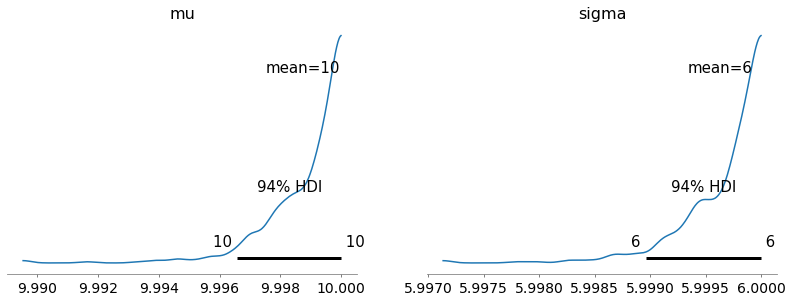

In [31]:
pm.plot_posterior(burned_trace)

In [32]:
with pm.Model() as model_g:
    mu1 = pm.Uniform("mu1", lower=-8, upper=7, testval=0)
    sigma1 = pm.HalfNormal("sigma1", sigma =1.5)
    
    #Likelihood
    likelihood1 = pm.Normal("likelihood1", mu=mu1, sd=sigma1, observed =bmi.values)
    
    #Posterior
    
    step  = pm.Metropolis()
    trace_1 = pm.sample(20000, chains=3, step=step, progressbar=True)
    burned_trace1 = trace_1[3000::20]

<ipython-input-32-0234d53a3428>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_1 = pm.sample(20000, chains=3, step=step, progressbar=True)
Multiprocess sampling (3 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma1]
>Metropolis: [mu1]


Sampling 3 chains for 1_000 tune and 20_000 draw iterations (3_000 + 60_000 draws total) took 6873 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [7]:
df.head()# importing the dataset
df = pd.read_csv('insurance.csv')

# viewing top 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
X=df.drop(['charges'], axis=1)
y=df['charges']

Feature: 0, Score: 257.28807
Feature: 1, Score: -131.11058
Feature: 2, Score: 332.57013
Feature: 3, Score: 479.36939
Feature: 4, Score: 23820.43412
Feature: 5, Score: -353.64002


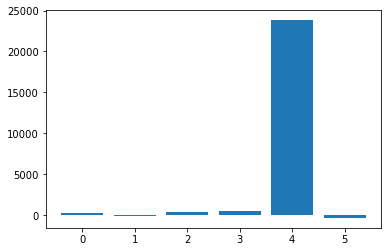

In [18]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
MCMC WITH ONE VARIABLE

In [25]:
charges=df['charges']

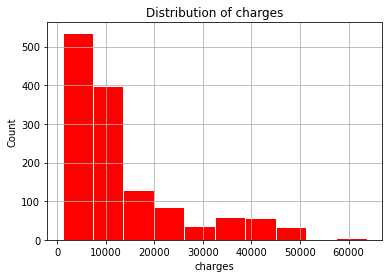

In [26]:
charges.hist(color = "red", edgecolor = "white")
plt.xlabel('charges'); plt.ylabel('Count');
plt.title('Distribution of charges');

lets just take 2 features smoker and children.

In [38]:
smoker=df['smoker']

In [39]:
smoker.mean()

0.20478325859491778

### BAYESIAN LINEAR REGRESSION WITH MCMC WITH ONE INDEPENDENT VARIABLE 

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [37]:
charges = df['charges']
df['charges'] = charges
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [ ]:
FIRST LETS GO WITH SMOKER.

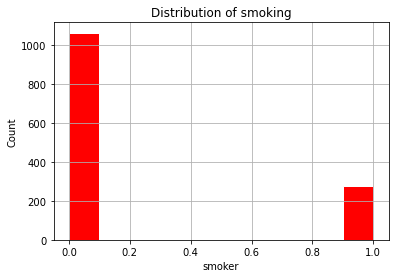

In [40]:
smoker.hist(color = "red", edgecolor = "white")
plt.xlabel('smoker'); plt.ylabel('Count');
plt.title('Distribution of smoking');

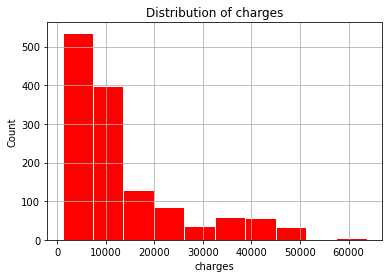

In [42]:
charges.hist(color = "red", edgecolor = "white")
plt.xlabel('charges'); plt.ylabel('Count');
plt.title('Distribution of charges');

In [48]:
def graphss(trace):
    pm.traceplot(trace)
    az.plot_trace(trace)
    az.plot_posterior(trace)

In [53]:
smoker.mean()

0.20478325859491778

In [58]:
import pymc3 as pm

x_data = smoker
y_data = charges

with pm.Model() as model3:
    beta = pm.Normal('beta', mu=0, sigma=5)
    logit = pm.math.dot(x_data, beta)
    # Logistic link
    p = 1 / (1 + np.exp(-logit))
    # Return loglik of Y
    obs = pm.Normal('obs', p, observed=y_data)
    
    step=pm.Metropolis()
    trace_mat_smoker = pm.sample(1000, chains=2, step=step, tune=2000, progressbar=True)

Multiprocess sampling (2 chains in 4 jobs)
Metropolis: [beta]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 8 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [51]:
import arviz as az

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


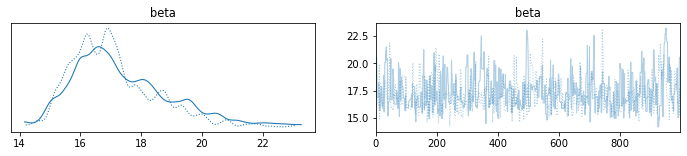

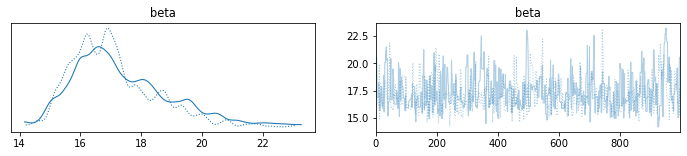

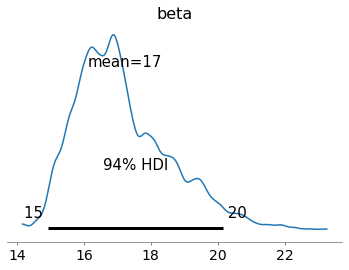

In [59]:
graphss(trace_mat_smoker)

In [60]:

with pm.Model() as model3_nuts:
    beta = pm.Normal('beta', mu=0, sigma=5)
    logit = pm.math.dot(x_data, beta)
    # Logistic link
    p = 1 / (1 + np.exp(-logit))
    # Return loglik of Y
    obs = pm.Normal('obs', p, observed=y_data)
    
    step=pm.NUTS()
    trace_nuts_smoker = pm.sample(1000, chains=2, step=step, tune=2000, progressbar=True)

Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 10 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


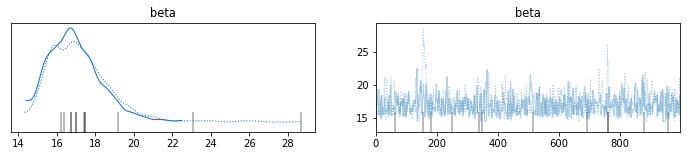

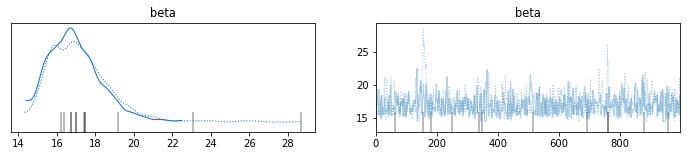

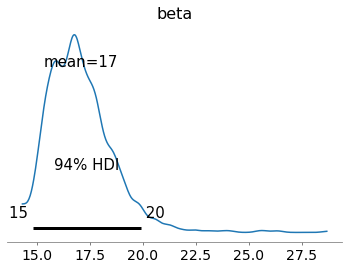

In [61]:
graphss(trace_nuts_smoker)

#### WITH RESPECT TO AGE.

In [62]:
age=df['age']

In [63]:
x_data = age
y_data = charges

with pm.Model() as model3:
    a = pm.Uniform('a', 0, 4)
    b = pm.Uniform('b', -4, 4)
    sigma = pm.Uniform('sigma', 0, 2)

    y_est = a * x_data + b
    y = pm.Normal('y', mu=y_est, sd=sigma, observed=y_data)
    step  = [pm.Metropolis()]
    trace_sim = pm.sample(10000, chains=2, step=step,progressbar=True)

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [b]
>Metropolis: [a]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 11 seconds.
The number of effective samples is smaller than 25% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


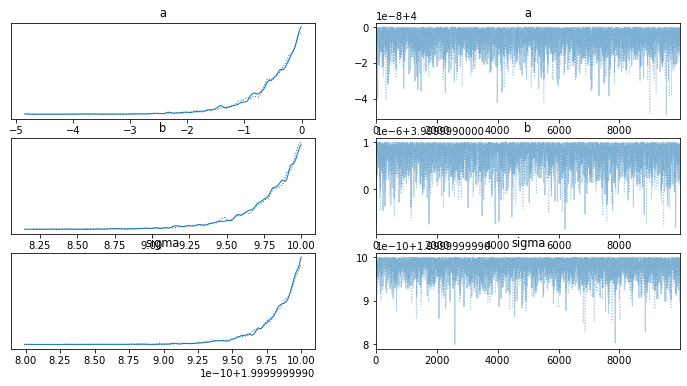

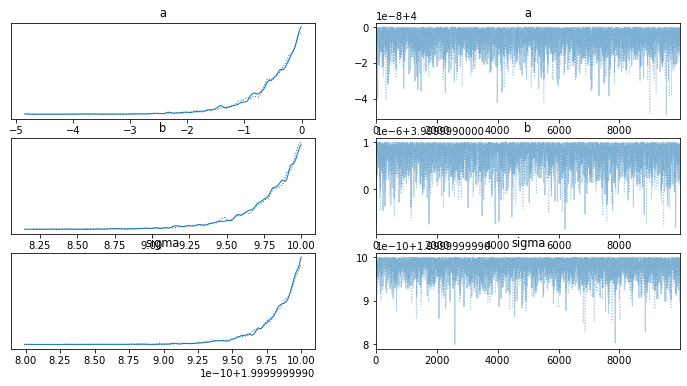

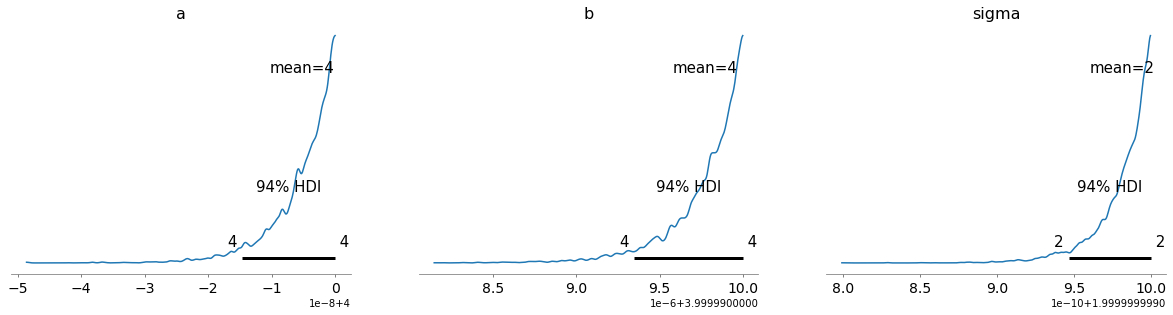

In [64]:
graphss(trace_sim)

### MORE THAN ONE INDEPENDENT VARIABLE

In [70]:
y_label= df['charges']
X_train, X_test, y_train, y_test = train_test_split(df, y_label, 
                                                        test_size = 0.25,
                                                        random_state=42)

In [72]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges
693,24,1,23.655,0,0,1,2352.96845
1297,28,0,26.510,2,0,2,4340.44090
634,51,1,39.700,1,0,3,9391.34600
1022,47,1,36.080,1,1,2,42211.13820
178,46,0,28.900,2,0,3,8823.27900


In [75]:
with pm.Model() as model_all:
    
    # The prior for the data likelihood is a Normal Distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula('y_train ~ age + sex + bmi + children + smoker + region', data = X_train, family = family)
    step= pm.Metropolis()
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    trace_all = pm.sample(1000, chains=2, step=step, tune=2000, progressbar=True)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [region]
>Metropolis: [smoker]
>Metropolis: [children]
>Metropolis: [bmi]
>Metropolis: [sex]
>Metropolis: [age]
>Metropolis: [Intercept]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 11 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


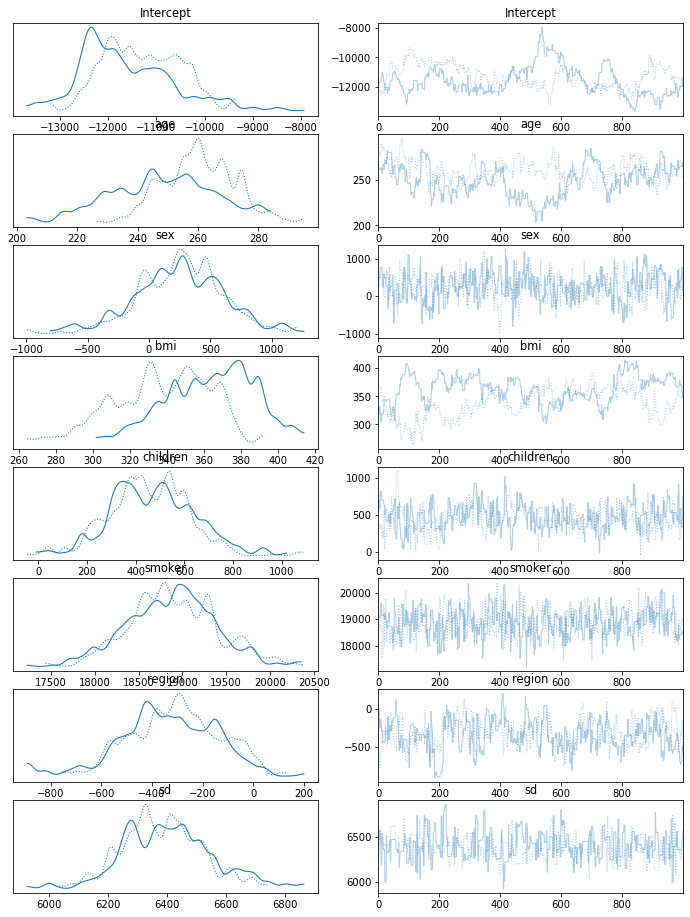

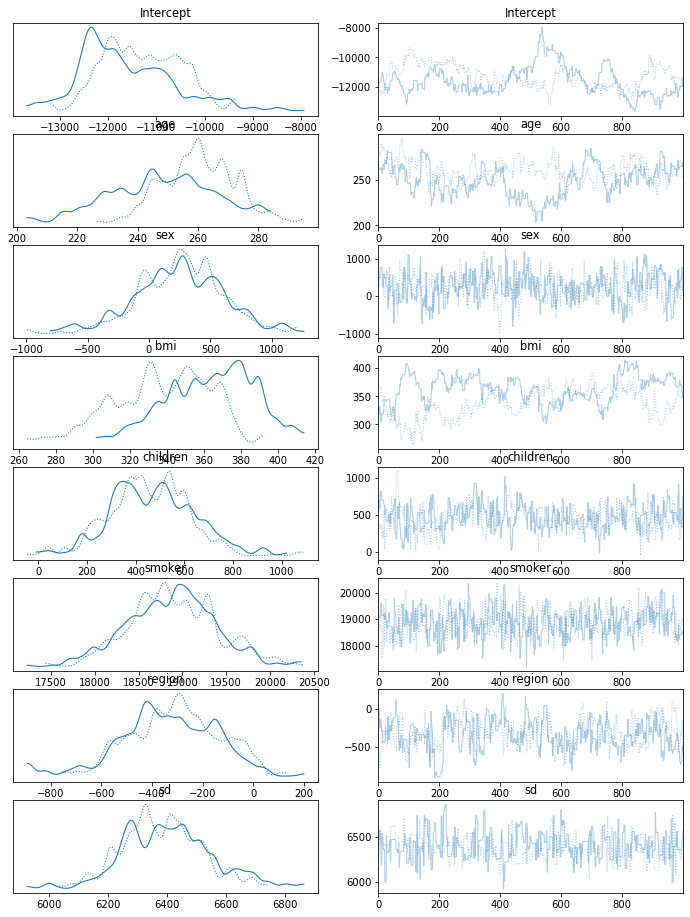

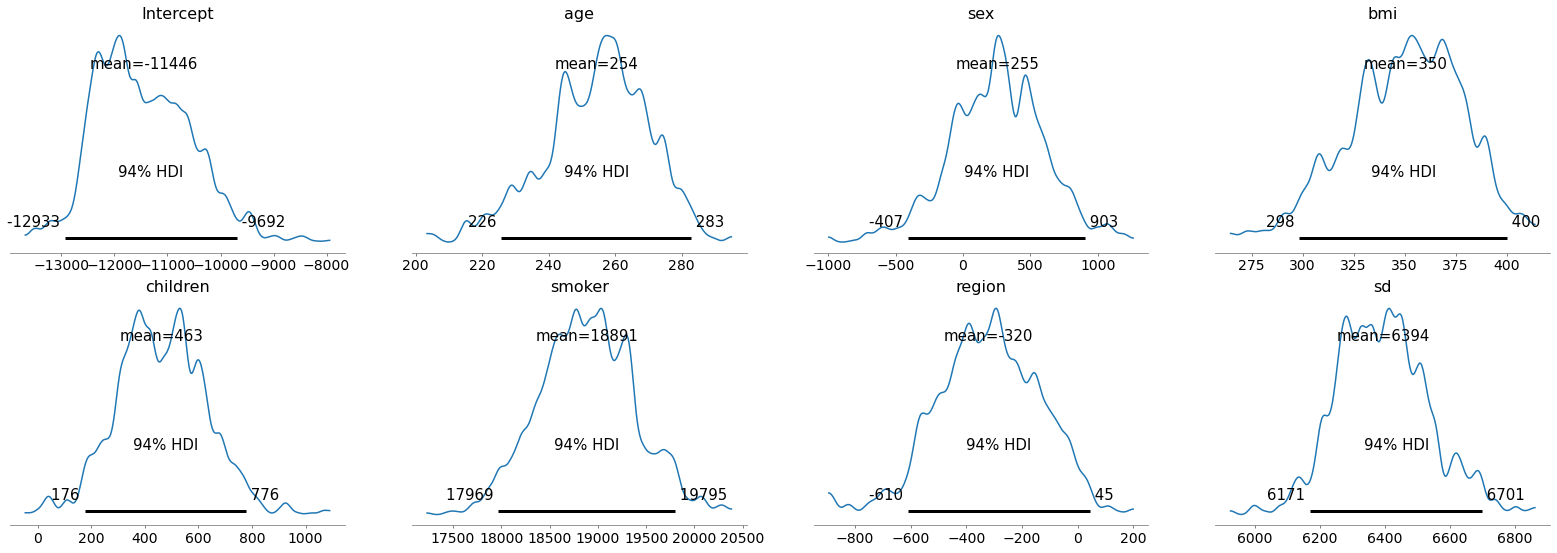

In [76]:
graphss(trace_all)

In [83]:
# Print out the mean variable weight from the trace
for variable in trace_all.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(trace_all[variable])))

Variable: Intercept       Mean weight in model: -11446.2734
Variable: age             Mean weight in model: 254.4663
Variable: sex             Mean weight in model: 254.6747
Variable: bmi             Mean weight in model: 350.3433
Variable: children        Mean weight in model: 463.0578
Variable: smoker          Mean weight in model: 18890.5083
Variable: region          Mean weight in model: -320.0945
Variable: sd_log__        Mean weight in model: 8.7629
Variable: sd              Mean weight in model: 6394.4020


In [85]:
var_dict = {}
for variable in trace_all.varnames:
    var_dict[variable] = trace_all[variable]

# Results into a dataframe
var_weights = pd.DataFrame(var_dict)

# Means for all the weights
var_means = var_weights.mean(axis=0)

# Create an intercept column

cols = X_test.columns.tolist()
cols = cols[-1:] + cols[:-1]
X_test = X_test[cols]
X_test['Intercept'] = 1


        
names = X_test.columns[1:]

X_test_t = X_test.loc[:, names]

var_means = var_means[names]

# Calculate estimate for each test observation using the average weights
results = pd.DataFrame(index = X_test_t.index, columns = ['estimate'])

for row in X_test_t.iterrows():
    results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))

# Metrics 
actual = np.array(y_test)
errors = results['estimate'] - actual
mae = np.mean(abs(errors))
rmse = np.sqrt(np.mean(errors ** 2))

print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    


Model  MAE: 4758.6361
Model RMSE: 6321.0575


#### PREDICTIONS

In [100]:
def test_model(trace, test_observation):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sd'].mean()

    # Actual Value
    actual = test_observation['charges']
    
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop('charges')
    #test_observation = test_observation.drop('cogs')
    #test_observation = test_observation.drop('tax')
    #test_observation = test_observation.drop('total')
        
    
    # Align weights and test observation
    var_weights = var_weights[test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)
    
    # Estimates of grade
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)

    # Plot all the estimates
    plt.figure(figsize(8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual grade
    plt.vlines(x = actual, ymin = 0, ymax = 5, 
               linestyles = '--', colors = 'red',
               label = 'True charges',
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('charges'); plt.ylabel('Density');
    
    # Prediction information
    print('True charges = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))


Test Observation:
charges      2117.33885
age            19.00000
sex             0.00000
bmi            22.51500
children        0.00000
smoker          0.00000
region          1.00000
Intercept       1.00000
Name: 899, dtype: float64
True charges = 2117
Average Estimate = 956.4714
5% Estimate = -8826.4327    95% Estimate = 11560.4492


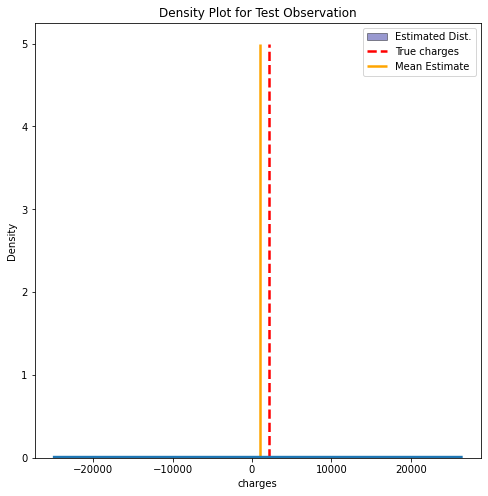

In [101]:
from IPython.core.pylabtools import figsize
test_model(trace_all, X_test.iloc[6])